In [1]:
import PIL
from PIL import ImageFont
from PIL import Image
from PIL import ImageDraw

from pathlib import Path
import glob

import random

import matplotlib.pyplot as plt

In [2]:
seed = 42

random.seed(seed)

In [3]:
def digit_gen(num_img: int = 0,
             max_seq_len: int = 5, min_seq_len: int = 3, random_seq_len: int=0,
             img_path: str = 'img', font_path: str = 'font',
             img_width: int = 40, img_height: int = 40) -> None:
    
    """
    num_img: Number of images to be generated, 0 or below means only displaying images with different fonts for preview but not saving them.
    
    max_seq_len, min_seq_len: Max/Min length of the digit sequences
    
    random_seq_len: Random int added on the `min_seq_len` to fomat the digit sequence strings.
    EG: raw digit sequence = 1, min_seq_len = 0, random_seq_len = 3, then the image can be `1`, `01` or `001`, depending on the random int added.
    
    img_path, font_path: Folder path for saving images, and path for loading saved fonts (downloaded from online)
    
    img_width, img_height: images size
    """
    
    font_list = glob.glob(font_path + '/*tf')
    preview = (num_img <= 0)
    
    if preview:
        num_img = len(font_list)
        fig, axs = plt.subplots(ncols=num_img)
        plt.rcParams['figure.figsize'] = (30, 18)
    else:
        Path(img_path).mkdir(parents=True, exist_ok=True) # create folder if not exist
        
    for i in range(num_img):
        digit_seq_str = format(random.randrange(10**max_seq_len), f'0{min_seq_len + random.randrange(random_seq_len + 1)}')
        img = Image.new('RGB', (img_width, img_height), (200, 200, 200))
        draw = ImageDraw.Draw(img)
        
        random_font_ind = i if preview else random.randrange(len(font_list))
        font = ImageFont.truetype(font_list[random_font_ind], 13)
        font_name = Path(font_list[random_font_ind]).name.split('-')[0]
        
        draw.text((3, 8 + random.randrange(3)), # position of the string
                  digit_seq_str,
                  (random.randrange(255), random.randrange(255), random.randrange(255)), # color
                  font=font)
        draw = ImageDraw.Draw(img)
        
        if preview:
            axs[i].imshow(img)
            axs[i].set_title(font_name, fontsize=10)
            axs[i].axis('off')
        else:
            img.save(img_path + f"/{digit_seq_str}_{font_name}_{i}.png")

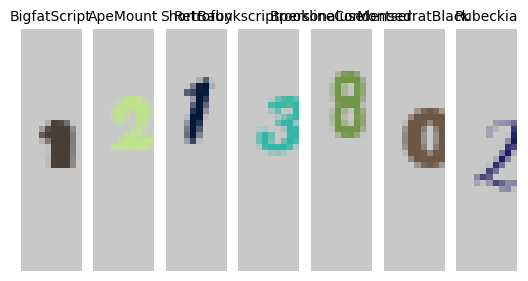

In [4]:
# single digit preview
digit_gen(max_seq_len=1, min_seq_len=1, img_width=10)

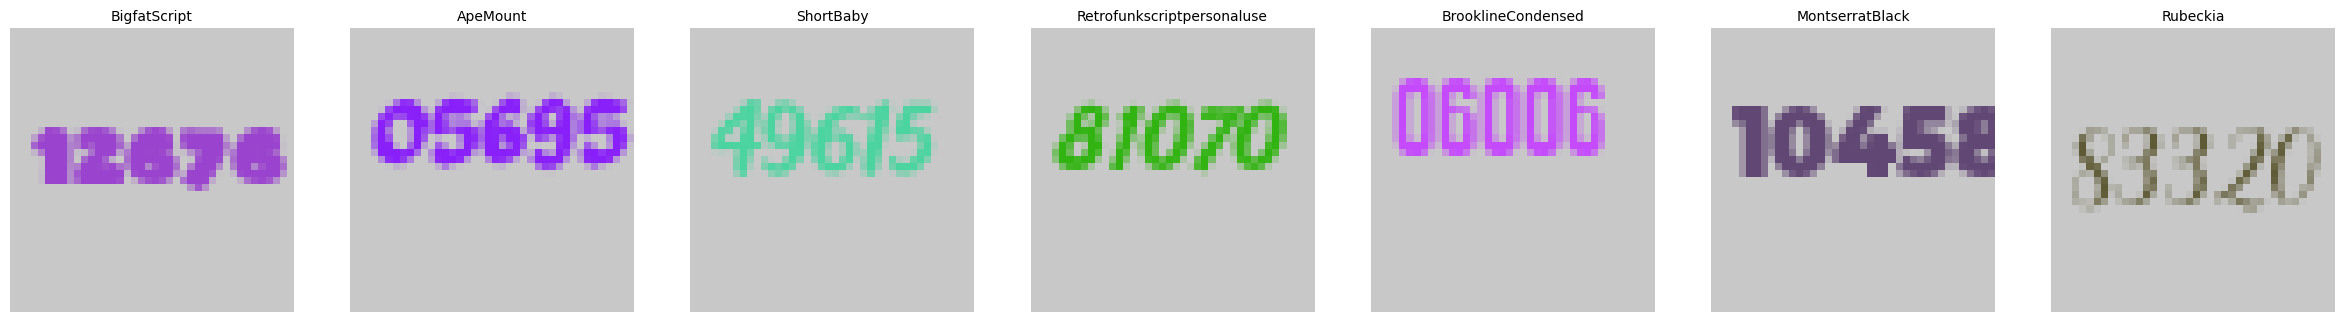

In [5]:
# 5 digits preview
digit_gen(max_seq_len=5, min_seq_len=3, random_seq_len=2, img_width=40)

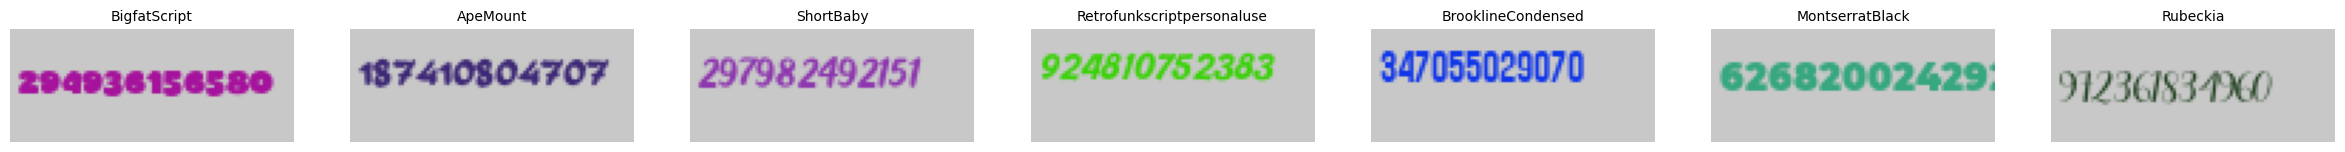

In [6]:
# 5 digits preview
digit_gen(max_seq_len=12, min_seq_len=6, random_seq_len=6, img_width=100)

In [7]:
# actually generate and save imgs
digit_gen(max_seq_len=1, min_seq_len=1, img_width=10,
         img_path='img/single_digit', num_img=2_000)

digit_gen(max_seq_len=5, min_seq_len=3, random_seq_len=2, img_width=40,
         img_path='img/five_digits', num_img=20_000)

digit_gen(max_seq_len=12, min_seq_len=6, random_seq_len=6, img_width=100,
         img_path='img/12_digits', num_img=100)